<a href="https://colab.research.google.com/github/88FaHaD/ML/blob/main/Cnnusingdataaugmentaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
!wget  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2024-02-22 17:20:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   164MB/s    in 0.6s    

2024-02-22 17:20:48 (164 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
zip_ref=zipfile.ZipFile('pizza_steak.zip')

In [3]:
zip_ref.extractall()
zip_ref.close()


In [4]:
!ls pizza_steak/train/

pizza  steak


In [5]:
!ls pizza_steak/test/

pizza  steak


In [6]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [7]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [8]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [9]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


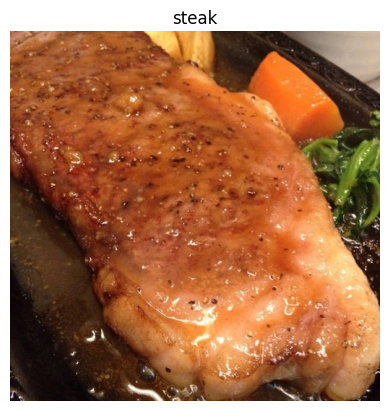

In [10]:

# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")


array([[[175, 112,  81],
        [185, 122,  91],
        [188, 125,  94],
        ...,
        [215, 191, 167],
        [214, 190, 166],
        [210, 186, 162]],

       [[171, 108,  77],
        [177, 114,  83],
        [177, 114,  83],
        ...,
        [213, 189, 165],
        [213, 189, 165],
        [210, 186, 162]],

       [[166, 103,  72],
        [169, 106,  75],
        [168, 105,  74],
        ...,
        [210, 186, 162],
        [211, 187, 163],
        [210, 186, 162]],

       ...,

       [[ 20,  10,   9],
        [ 31,  21,  20],
        [ 34,  24,  23],
        ...,
        [ 19,  11,   8],
        [ 18,  10,   7],
        [ 16,   8,   5]],

       [[ 25,  15,  13],
        [ 32,  22,  20],
        [ 32,  22,  20],
        ...,
        [ 20,  12,   9],
        [ 18,  11,   5],
        [ 17,  10,   4]],

       [[ 25,  16,  11],
        [ 23,  14,   9],
        [ 26,  16,  14],
        ...,
        [ 20,  12,   9],
        [ 18,  11,   5],
        [ 17,  10,   4]]], dtype=uint8)
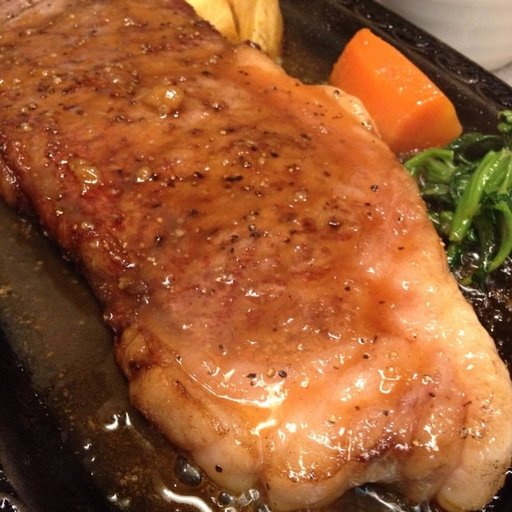

In [11]:
# View the img (actually just a big array/tensor)
img


In [12]:
img.shape # returns (width, height, colour channels)

(512, 512, 3)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Data Augmentation

In [14]:
#image data generator fior augmented training data
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=0.2,
                                           zoom_range=0.2,
                                           shear_range=0.2,
                                           width_shift_range=0.3,
                                           height_shift_range=0.3,
                                           horizontal_flip=False

                                           )

#image data generator for non augmented training data
train_datagen=ImageDataGenerator(rescale=1/255.)

#image data generator for test data
test_datagen=ImageDataGenerator(rescale=1/255.)

# creating the data sets

In [15]:
print('Augmented training data')
train_augmented_data=train_datagen_augmented.flow_from_directory('/content/pizza_steak/train',
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode='binary',
                                                                 shuffle=False)
print('\n Training data ')
train_data=train_datagen.flow_from_directory('/content/pizza_steak/train',
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='binary',
                                             shuffle=False)

print('\n Test data')
test_data=test_datagen.flow_from_directory('/content/pizza_steak/test',
                                       target_size=(224,224),
                                       batch_size=32,
                                       class_mode='binary')


Augmented training data
Found 1500 images belonging to 2 classes.

 Training data 
Found 1500 images belonging to 2 classes.

 Test data
Found 500 images belonging to 2 classes.


In [16]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_augmented_data.next() # Note: labels aren't augmented, they stay the same

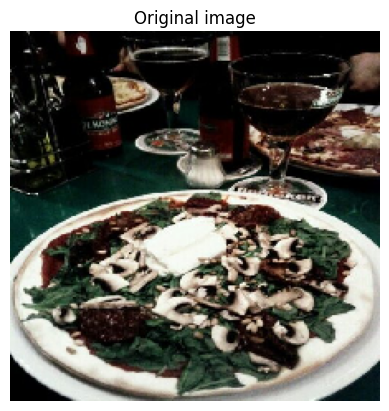

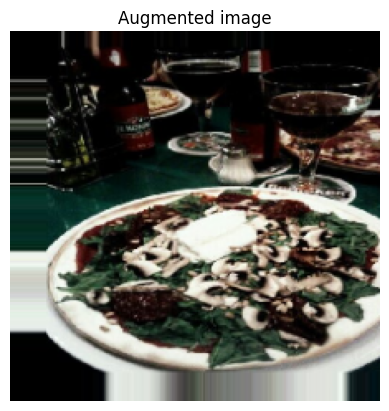

In [17]:

# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [18]:
import tensorflow as tf

In [19]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,strides=1,padding='valid',input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
    ])


In [20]:

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
                )

In [21]:
history = model.fit(train_augmented_data, epochs=5, verbose=0, steps_per_epoch=len(train_augmented_data),
                      validation_data=(test_data), validation_steps=len(test_data))

In [31]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

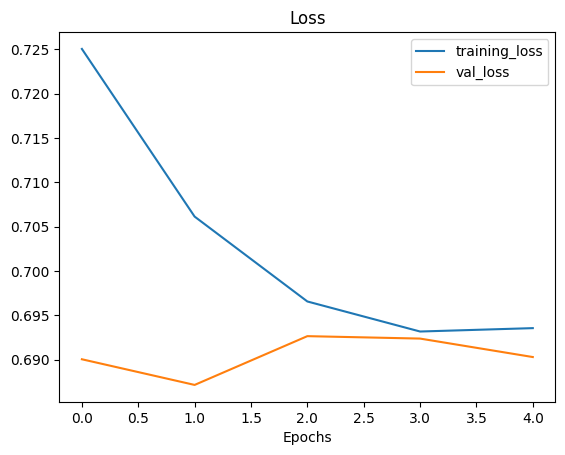

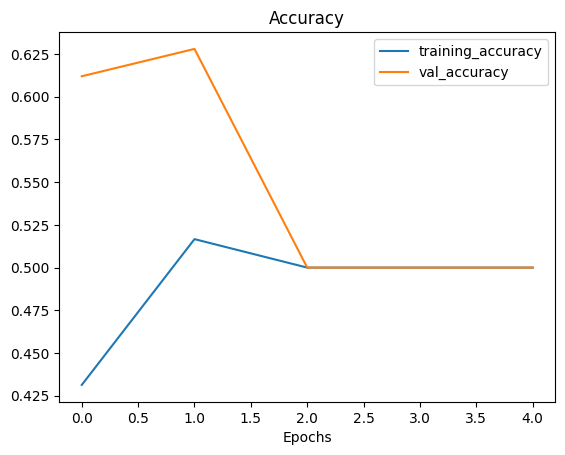

In [32]:
plot_loss_curves(history)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#creating shufled data

In [24]:
train_datagen_augmented_shufled=train_datagen_augmented.flow_from_directory('/content/pizza_steak/train',
                                                                            target_size=(224,224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True)
train_data_shufled=train_datagen.flow_from_directory('/content/pizza_steak/train',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode='binary',
                                                     shuffle=True)

test_data=test_datagen.flow_from_directory('/content/pizza_steak/test',
                                       target_size=(224,224),
                                       batch_size=32,
                                       class_mode='binary')


Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


# creating a shufled model

In [28]:
model2=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, strides=1, padding='valid', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy']
               )

history2=model2.fit(train_datagen_augmented_shufled,epochs=5,steps_per_epoch=len(train_datagen_augmented_shufled),validation_data=test_data,validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 24s 469ms/step - loss: 0.6638 - accuracy: 0.5900 - val_loss: 0.5525 - val_accuracy: 0.7340
Epoch 2/5
47/47 [==============================] - 22s 460ms/step - loss: 0.5652 - accuracy: 0.7067 - val_loss: 0.4497 - val_accuracy: 0.7860
Epoch 3/5
47/47 [==============================] - 22s 458ms/step - loss: 0.5743 - accuracy: 0.7053 - val_loss: 0.3980 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 22s 478ms/step - loss: 0.5147 - accuracy: 0.7540 - val_loss: 0.3761 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 22s 474ms/step - loss: 0.5042 - accuracy: 0.7560 - val_loss: 0.3536 - val_accuracy: 0.8380


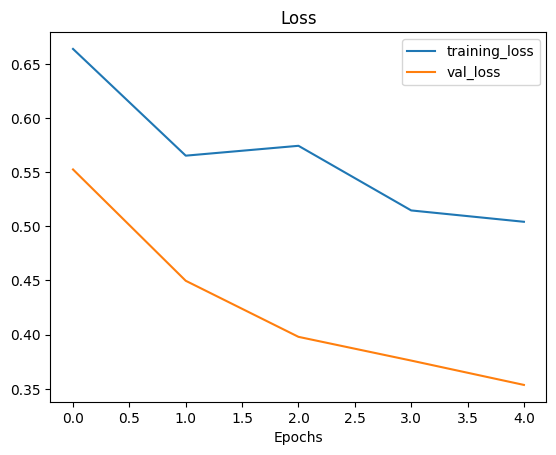

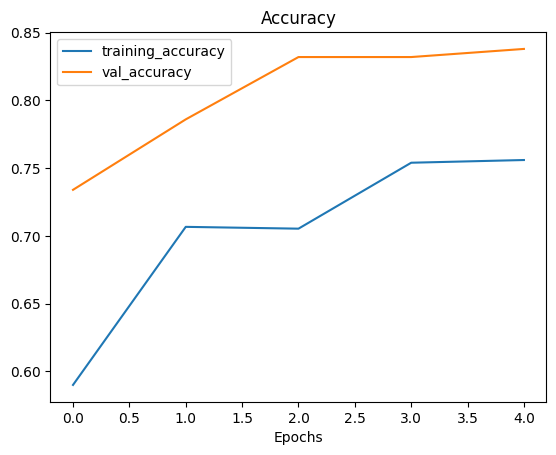

In [41]:

plot_loss_curves(history2)

# Improving the model
* 1 Adding learning rate

* 2 Adding more epochs

In [40]:
model3=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,strides=1,padding='valid',input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy']
)

history3=model3.fit(train_datagen_augmented_shufled,epochs=10,steps_per_epoch=len(train_augmented_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 25s 481ms/step - loss: 0.6903 - accuracy: 0.5847 - val_loss: 0.5811 - val_accuracy: 0.6720
Epoch 2/10
47/47 [==============================] - 23s 498ms/step - loss: 0.6407 - accuracy: 0.6600 - val_loss: 0.4834 - val_accuracy: 0.7400
Epoch 3/10
47/47 [==============================] - 23s 490ms/step - loss: 0.5782 - accuracy: 0.6873 - val_loss: 0.4541 - val_accuracy: 0.7740
Epoch 4/10
47/47 [==============================] - 23s 487ms/step - loss: 0.5424 - accuracy: 0.7313 - val_loss: 0.4597 - val_accuracy: 0.7660
Epoch 5/10
47/47 [==============================] - 23s 496ms/step - loss: 0.5324 - accuracy: 0.7487 - val_loss: 0.3861 - val_accuracy: 0.8500
Epoch 6/10
47/47 [==============================] - 24s 510ms/step - loss: 0.5507 - accuracy: 0.7333 - val_loss: 0.3702 - val_accuracy: 0.8520
Epoch 7/10
47/47 [==============================] - 22s 463ms/step - loss: 0.5144 - accuracy: 0.7533 - val_loss: 0.3414 - val_accuracy: 0.8540

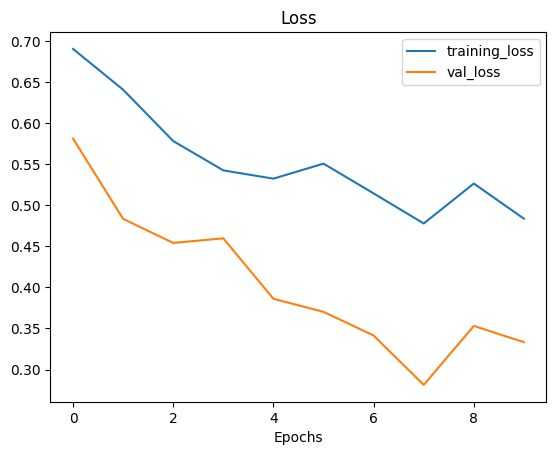

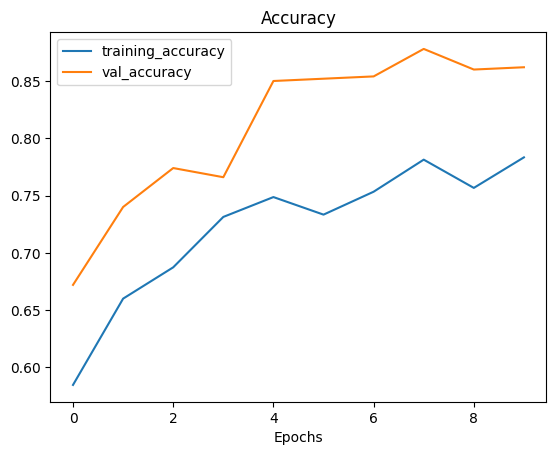

In [43]:

plot_loss_curves(history3)

In [44]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2024-02-22 18:33:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.05s   

2024-02-22 18:33:53 (41.7 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



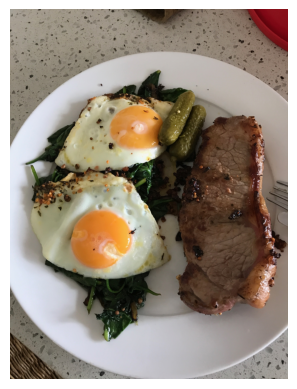

In [45]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [46]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [47]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [48]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [49]:
 #Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [50]:
pred = model3.predict(steak)
pred

1/1 [==============================] - 0s 471ms/step


array([[0.8183533]], dtype=float32)

In [51]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [52]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [53]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 71ms/step


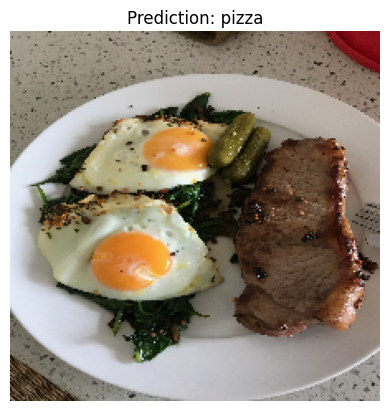

In [58]:
pred_and_plot(model, "03-steak.jpeg", class_names)

1/1 [==============================] - 0s 25ms/step


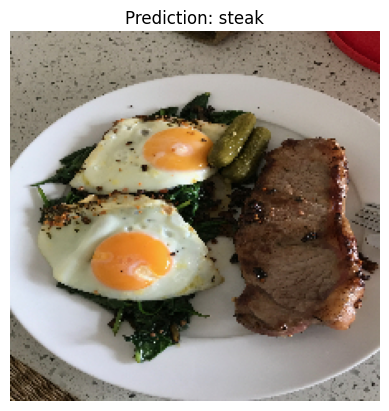

In [59]:
pred_and_plot(model2, "03-steak.jpeg", class_names)

1/1 [==============================] - 0s 28ms/step


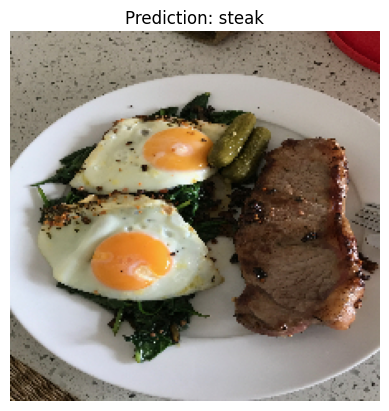

In [60]:
pred_and_plot(model3, "03-steak.jpeg", class_names)

In [61]:
model.evaluate(test_data)

16/16 [==============================] - 2s 126ms/step - loss: 0.6903 - accuracy: 0.5000


[0.6902822256088257, 0.5]

In [63]:
model2.evaluate(test_data)

16/16 [==============================] - 2s 93ms/step - loss: 0.3536 - accuracy: 0.8380


[0.35358673334121704, 0.8379999995231628]

In [64]:
model3.evaluate(test_data)

16/16 [==============================] - 2s 91ms/step - loss: 0.3333 - accuracy: 0.8620


[0.33328425884246826, 0.8619999885559082]